<h1> Weather humidity prediction </h1>
<h3> About </h3>
In this Data Science project, we will analyse the features of the dataset with mathematical
models and how accurately a machine learning classifier can predict the humidity of the day.  
First, we use regression to predict the numeral value of humidity. After that, we classify whether the weather is dry or humid.

In [1]:
%matplotlib inline
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix



<h2> Data exploration </h2>

In [2]:
#Train files (We drop datetime)
df_trainx = pd.read_csv('weather_data_train.csv',sep=';',decimal=',').drop('datetime',axis=1)
df_trainy = pd.read_csv('weather_data_train_labels.csv',sep=';', decimal=',').drop('datetime',axis=1)

#Test files
df_testx = pd.read_csv('weather_data_test.csv',sep=';', decimal=',').drop('datetime',axis=1)
df_testy = pd.read_csv('weather_data_test_labels.csv',sep=';', decimal=',').drop('datetime',axis=1)

#Combining files
X = pd.concat([df_trainx, df_testx]).reset_index(drop=True)
y = pd.concat([df_trainy, df_testy]).reset_index(drop=True)
both = pd.concat([X, y],axis=1)

<img src="dataset.png">

<h5> Targets are U_mu = numeral value of humidity(millilitre) and OBSERVED = whether the weather for that day is humid or dry. </h5>

In [12]:
#OBSERVED (1 = Humid, 0 = dry)
y['OBSERVED'].value_counts()

1    2820
0    1666
Name: OBSERVED, dtype: int64

In [13]:
#U_mu
y['U_mu'].head()

0    88.625
1    82.000
2    86.000
3    91.000
4    89.000
Name: U_mu, dtype: float64

In [5]:
both.head()

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var,OBSERVED,U_mu
0,14.4875,751.3000,751.6375,3.500,13.30,15.95,11.425,12.550,0.926964,1.008571,0.979821,1.142857,0.320,4.205,155.590714,1.994286,0,88.625
1,14.1875,758.0625,758.3625,3.625,11.20,15.95,27.500,11.025,4.801250,7.965536,7.679821,0.267857,5.780,6.125,147.142857,1.942143,1,82.000
2,15.3000,762.1125,762.4375,3.000,13.15,16.70,12.875,12.875,3.754286,1.824107,1.742679,0.857143,1.445,10.580,23.553571,0.122143,1,86.000
3,14.0250,766.4000,766.7625,2.500,12.00,16.65,7.200,12.500,4.896429,0.417143,0.431250,0.285714,0.180,10.125,35.974286,0.968571,1,91.000
4,14.2750,764.7125,765.0500,3.250,12.55,15.80,10.625,12.475,3.659286,1.672679,1.680000,0.785714,3.645,3.920,16.267857,1.005000,1,89.000


In [6]:
both.describe()

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var,OBSERVED,U_mu
count,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000
mean,6.656337,758.974103,759.316772,3.654502,4.785444,8.514809,25.614616,3.149873,4.305627,4.096810,4.095708,1.340105,3.700738,4.045327,91.069422,2.683228,0.628622,80.344654
std,8.474028,8.599151,8.603197,1.227183,8.467583,8.788613,11.960196,7.945078,5.015833,7.262317,7.261115,1.248030,7.080895,5.857302,102.556110,4.304537,0.483227,12.172432
min,-22.675000,725.525000,725.875000,1.000000,-26.200000,-21.000000,0.625000,-25.912500,0.014286,0.005000,0.005000,0.000000,0.000000,0.000000,0.000000,0.008095,0.000000,34.285714
25%,0.937500,753.528125,753.853125,2.750000,-0.350000,2.100000,16.285714,-1.768750,0.898393,0.488002,0.498830,0.571429,0.125000,0.320000,17.648393,0.551429,0.000000,73.625000
50%,6.179167,758.962500,759.293750,3.500000,4.400000,7.850000,24.687500,2.675000,2.517817,1.541250,1.539554,0.982143,0.916667,2.000000,50.399296,1.288987,1.000000,83.187500
75%,13.800000,764.412500,764.750000,4.375000,11.800000,16.000000,34.562500,9.687500,5.906557,4.510179,4.529480,1.642857,3.920000,5.445000,128.089286,2.976607,1.000000,89.375000
max,26.145833,790.425000,790.812500,10.791667,23.650000,28.750000,50.000000,21.462500,66.571250,108.117143,108.515536,17.571429,93.845000,105.125000,645.760000,77.449821,1.000000,99.875000


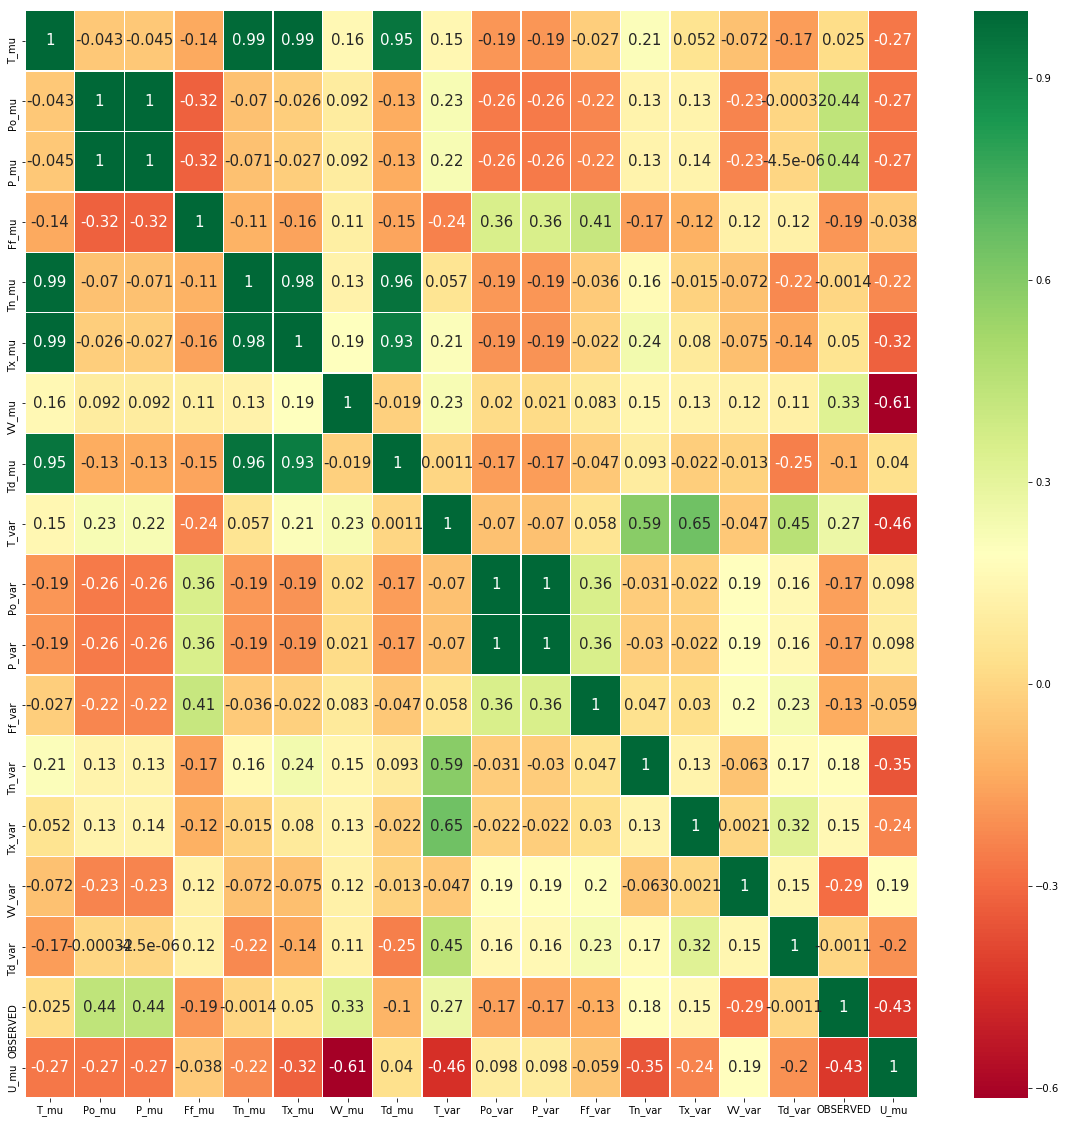

In [8]:
#Correlation between features and targets

both_corr = both.corr()
plt.figure(figsize=(20,20)) 
plt.tight_layout(pad=0)
sns.heatmap(both_corr, 
        xticklabels=both_corr.columns,
        yticklabels=both_corr.columns,
        annot=True, linewidths=.5,cmap='RdYlGn',annot_kws={'fontsize':15})

<h2> Model fitting, predictions </h2>
<h3> Regression</h3>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y[['U_mu']], test_size=0.25, random_state = 34)

standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Mean squared error', mean_squared_error(y_pred, y_test))

Mean squared error 2.0132355249228198


<h3> Classification </h3>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy 0.8057040998217468


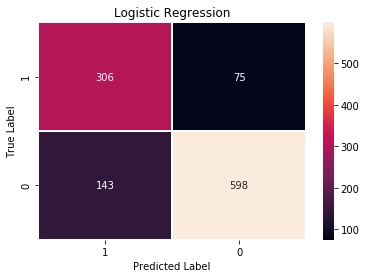

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y[['OBSERVED']], test_size=0.25, random_state = 34)

X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

logr = LogisticRegression(warn=false)
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

sns.heatmap(confusion_matrix(y_pred, y_test), 
        xticklabels=[1,0],
        yticklabels=[1,0],
        annot=True,
        fmt='g',
        linewidths=.5)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Logistic Regression')
print('accuracy', accuracy_score(y_pred, y_test))